# Avaliação - Estatística (Turma 735)

Aluno: João Francisco Baiochi
---

### Importação e Configuração

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import norm, t as t_student 
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

# define colors
colors = {
    'cyan': '#1696d2',
    'gray': '#5c5859',
    'black': '#000000',
    'yellow': '#fdbf11',
    'orange': '#ca5800',
    'magenta': '#af1f6b',
    'green': '#408941',
    'red': '#a4201d'
}
color_palette = ['#1696d2', '#5c5859', '#fdbf11', '#af1f6b', '#408941']
sns.set()
sns.set_palette(color_palette)

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Statsmodels.api: {sm.__version__}')

Numpy: 1.20.3
Pandas: 1.3.4
Seaborn: 0.11.2
Statsmodels.api: 0.12.2


## <font color='Gold'>Questão 01</font>

Carregue os dados do dataset [`car_details`](https://s3-sa-east-1.amazonaws.com/lcpi/4fbc4943-7af3-4c42-9a21-4d9eb121a28d.csv)

### Carregando o Dataset

In [3]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/4fbc4943-7af3-4c42-9a21-4d9eb121a28d.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### A)
Classifique as variáveis do dataset como quantitativas (contínua/discreta) ou qualitativas (ordinal/nominal)

In [7]:
# valores que expressam atributos sem nenhum tipo de ordem
variaveis_norminais = ['name','fuel', 'seller_type', 'transmission']
# valores que expressam atributos, porém com algum tipo de ordem ou grau
variaveis_ordinais = ['owner']
# valores que expressam atributos nos valores reais
variaveis_continuas = ['selling_price','km_driven']
# valores que expressam atributos nos valores inteiros
variaveis_discretas = ['year']

### B) 
Obtenha a média, a mediana e a moda das variáveis quantitativas e, em seguida, classifique cada uma dessas variáveis quanto à sua simetria. 

In [45]:
# Calcula as medidas de tendência central
def calc_meds_tc(array):
    print(f'Feature {array.name}')
    if array.dtype == 'int64':
        mean = round(array.mean())
    elif array.dtype == 'float64':
        mean = round(array.mean(),2)
    else:
        mean = array.mean()
    median = array.median()
    mode = array.mode()[0]
    print(f'Média = {mean}\nMediana = {median}\nModa = {mode}')
    if (mode < median) & (median < mean):
        print('Assimetria à direita.')
    elif (mean < median) & (median < mode):
        print('Assimetria à esquerda.')
    else:
        print('Simétrica')

    sns.histplot(array, kde=True)
    plt.vlines(ymin=0, ymax=max(array.value_counts())*1.2, x=mean, label='Média', color=colors['yellow'])
    plt.vlines(ymin=0, ymax=max(array.value_counts())*1.2, x=median, label='mediana', color=colors['orange'])
    plt.vlines(ymin=0, ymax=max(array.value_counts())*1.2, x=mode, label='Moda', color=colors['red'])
    plt.title(f'Medidas de Tendência Central - {array.name}')
    plt.legend()

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


Feature year
Média = 2013
Mediana = 2014.0
Moda = 2017
Assimetria à esquerda.


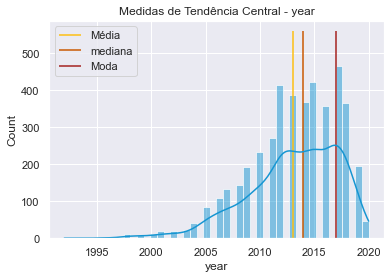

In [46]:
calc_meds_tc(df.year)

Feature selling_price
Média = 504127
Mediana = 350000.0
Moda = 300000
Assimetria à direita.


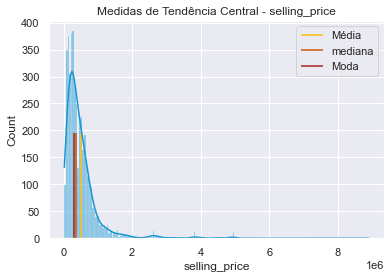

In [47]:
calc_meds_tc(df.selling_price)

Feature km_driven
Média = 66216
Mediana = 60000.0
Moda = 70000
Simétrica


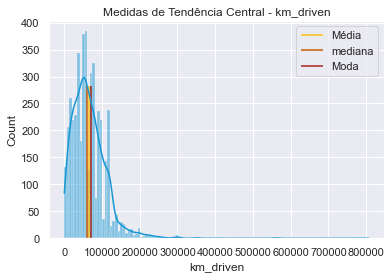

In [48]:
calc_meds_tc(df.km_driven)

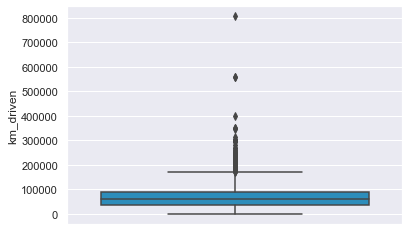

In [52]:
sns.boxplot(y=df.km_driven);

A variável **km_driven** possúi alguns outliers, se removídos ela aparenta mais ter o comportamento de uma distribuição simétrica:

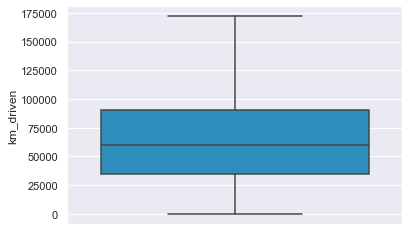

In [53]:
sns.boxplot(y=df.km_driven, showfliers=False);

### C)
Calcule os percentis do preço de venda dos carros. Em seguida, indique o percentual dos carros que podem ser adquiridos por um preço de até R\\$ 120.000,00.  

In [56]:
selling_price_percentis = df.selling_price.quantile([i/100 for i in range(1,100)])
selling_price_percentis.describe()

count    9.900000e+01
mean     4.831840e+05
std      4.674404e+05
min      5.500000e+04
25%      2.098749e+05
50%      3.500000e+05
75%      6.000000e+05
max      3.200000e+06
Name: selling_price, dtype: float64

In [58]:
selling_price_percentis[selling_price_percentis < 120000].index[-1]

0.1

Até 10% dos carros podem ser adquiridos por um preço de até R$ 120.000,00

## <font color='Gold'>Questão 02</font>

De 50.000 válvulas fabricadas por uma companhia retira-se uma amostra de 400 válvulas, e obtém a vida média de 800 horas e o desvio padrão de 100 horas.

### A) 
Qual o intervalo de conﬁança de 99% para a vida média da população?  

In [81]:
# confiança
beta = 0.99
# significancia
alpha = 1 - beta
# tamanho amostral
n = 400
media_amostral = 800
sigma = 100
# z
z_alpha = norm.ppf(beta + alpha/2)
print(f'Z_alpha: {z_alpha}')

Z_alpha: 2.5758293035489004


In [82]:
erro = z_alpha * (sigma / np.sqrt(n))
print(f'Erro: {erro}')

Erro: 12.879146517744502


In [84]:
print(f'Intervalo de confiança para 99%: ({round(media_amostral - erro,2)} , {round(media_amostral + erro,2)})')

Intervalo de confiança para 99%: (787.12 , 812.88)


### B) 
Que tamanho deve ter a amostra para que o erro máximo seja de 7,84 horas, com uma confiança de 95%? 

In [89]:
erro = 7.84
beta = 0.95
alpha = 1- beta
z_alpha_2 = norm.ppf(beta + alpha/2)
z_alpha_2

1.959963984540054

In [90]:
n = ((sigma * z_alpha_2)/ erro)**2
n

624.9770311676979

In [91]:
print(f'O tamanho da amostra deve ser de {round(n)} unidades.')

O tamanho da amostra deve ser de 625 unidades.


## <font color='Gold'>Questão 03</font>

Na indústria cerâmica, avalia-se sistematicamente a resistência de amostras de massas cerâmicas, após o processo de queima. Dessas avaliações, sabe-se que certo tipo de massa tem resistência mecânica aproximadamente normal, com **média populacional de 53 MPa** e **variância populacional de 16 MPa²**. Após a troca de alguns fornecedores de matérias-primas, deseja-se **verificar se houve alteração na qualidade** (se a média deixou de ser 53 MPa). Uma **amostra de 15** corpos de prova de massa cerâmica acusou **média igual a 50 MPa**. Qual é a conclusão ao nível de significância de 5%?

### Formulação do Teste de Hipóteses

$\mu$ : valor da resistência em MPa

$H_0: \mu = 53 MPa$

$H_1: \mu \neq 53 MPa$

### Cálculo do teste

$$Z =  \frac{\bar{x} - \mu * \sqrt{n}}{\sigma}

In [114]:
media = 53
var = 16
sigma = np.sqrt(var)
amostra = 15
media_amostral = 50
alpha = 0.05
beta = 1 - alpha
z_alpha_2 = norm.ppf(beta + alpha/2)
print(f'Z_alpha_2: {z_alpha_2}')

Z_alpha_2: 1.959963984540054


In [115]:
z = (media_amostral - media) * np.sqrt(amostra) / sigma
z

-2.904737509655563

In [116]:
p_value = norm.cdf(z) * 2
p_value

0.0036756121177412234

### Conclusão

Rejeitar $H_0$ se $z \leq z_{\alpha_2}$  
Rejeitar $H_0$ se o valor $p\leq\alpha$  

In [118]:
print(f'Z > Z_alpha_2 : {z <= z_alpha_2}') 
print(f'P_value < Alpha: {p_value <= alpha}') 

Z > Z_alpha_2 : True
P_value < Alpha: True


<font size=4>Segundo o teste estatístico, devemos rejeitar a hipeotese nula e concluir que houve alteração na qualidade das massas cerâmicas.</font>

## <font color='Gold'>Questão 04</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

> [Link para o dataset](https://s3-sa-east-1.amazonaws.com/lcpi/360d2eaa-970a-4204-8004-53bb42af101a.csv).

### Tabela de referência UF

> **OBS.:** Os dados da dataset referentes à UF foram convertidos (de categóricos para numéricos), portanto, utilize a tabela abaixo para identificar SP e RJ:

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Verificando o Dataset

In [120]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/360d2eaa-970a-4204-8004-53bb42af101a.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [144]:
df.query('UF == 33 | UF == 35').groupby('UF')['Renda'].mean().to_frame('Renda Média').rename({33:'Rio de Janeiro', 35:'São Paulo'}).reset_index()

,UF,Renda Média
0,Rio de Janeiro,2496.403168
1,São Paulo,2638.104986


### Selecionando as amostras

In [125]:
n = 500
rj_df = df.query('UF == 33').sample(n, random_state=101)['Renda']
sp_df = df.query('UF == 35').sample(n, random_state=101)['Renda']

### Formulação do Teste de Hipótese:

$\mu_1$ : média dos rendimentos dos trabalhadores do Estado do Rio de Janeiro  
$\mu_2$ : média dos rendimentos dos trabalhadores do Estado de São Paulo  


$H_0: \mu_1 - \mu_2  \leq 0$

$H_1: \mu_1 - \mu_2 > 0$

### Calculando o valor Z

In [130]:
D0 = 0
alpha = 0.05
beta = 1 - alpha
# numero da amostra
n1 = len(rj_df)
n2 = len(sp_df)

# media amostral
x1 = rj_df.mean()
x2 = sp_df.mean()

# desvio padrão amostral
sigma1 = rj_df.std()
sigma2 = sp_df.std()

# calculo do test Z
numerador = (x1 - x2) - D0
denominador = np.sqrt((sigma1 **2 / n1) + (sigma2**2 / n2))
z = numerador / denominador
print(f'Valor crítico z = {z}')
z_alpha = norm.ppf(beta)
print(f'Valor z_alpha para confiança 95% = {z_alpha}')
p_value = norm.sf(z)
print(f'P_value = {p_value}')

Valor crítico z = -2.255318273608561
Valor z_alpha para confiança 95% = 1.6448536269514722
P_value = 0.9879433207843067


Método alternativo com a biblioteca **DescrStatsW**

In [134]:
rj_test = DescrStatsW(rj_df)
sp_test = DescrStatsW(sp_df)
test = CompareMeans(rj_test, sp_test)
z , p_value = test.ztest_ind(alternative='larger', value=D0)
print(f'z = {z}\np_value = {p_value}')

z = -2.255318273608558
p_value = 0.9879433207843066


### Conclusão

Rejeitar $H_0$ se $z \geq z_{\alpha}$  
Rejeitar $H_0$ se o valor $p\leq\alpha$  

In [135]:
print(f'Z > Z_alpha : {z >= z_alpha}') 
print(f'P_value < Alpha: {p_value <= alpha}') 

Z > Z_alpha : False
P_value < Alpha: False


<font size=4>Conforme os testes realizados, aceitamos $H_0$ e concluimos que os rendimentos dos trabalhores do Rio de Janeiro são menores se comparado aos trabalhadores de São Paulo</font>

## <font color='Gold'>Questão 05</font>

Utilize o dataset [`house-prices-clean.csv`](https://s3-sa-east-1.amazonaws.com/lcpi/a6c106c4-87a1-4953-980b-106889749acd.csv) para criar um modelo de regressão linear capaz de estimar o preço de venda (coluna `'SalePrice'`) das casas.

O que é esperado de você nessa questão:

1. Crie um modelo considerando apenas as variáveis númericas, por exemplo;
2. Remova os outliers e vefique como fica o modelo;
3. Você pode eliminar variáveis desnecessárias.

> Lembrando que para cada um dos itens acima, é importante que você avalie o modelo em termos do $R^2$ e dos resíduos. Escrever os motivos de algumas das suas decisões e comentar suas respostas poderão me ajudar a entender melhor no momento da correção.

### Leitura dos Dados

In [346]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/a6c106c4-87a1-4953-980b-106889749acd.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Verificando os tipos dos dados

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [348]:
df.dtypes.value_counts()

object     38
int64      35
float64     3
dtype: int64

#### Selecionando apenas as variáveis numéricas

In [349]:
df = df.select_dtypes(include=['int64', 'float64'])
df.shape

(1460, 38)

#### Checando valores nulos

In [350]:
df.isnull().sum().sum()

0

#### Eliminando a variável ID

In [351]:
df.drop('Id', axis=1, inplace=True)

### Examinando a variável da predição <font color='DodgerBlue'>SalePrice</font>

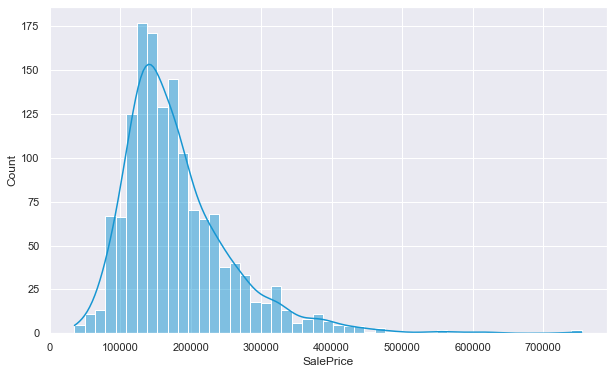

In [352]:
plt.figure(figsize=(10,6))
sns.histplot(df.SalePrice, kde=True);

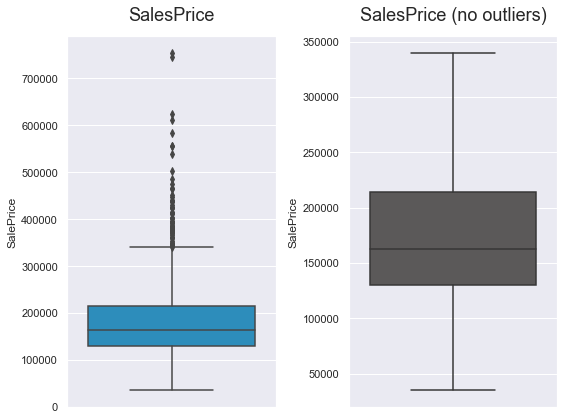

In [353]:
fig, axes = plt.subplots(1,2,figsize=(8,6))
sns.boxplot(y=df.SalePrice, ax=axes[0])
axes[0].set_title('SalesPrice', fontsize=18, pad=15)
sns.boxplot(y=df.SalePrice, showfliers=False, color=colors['gray'], ax=axes[1])
axes[1].set_title('SalesPrice (no outliers)', fontsize=18, pad=15)
plt.tight_layout()

### Correlação dos Dados

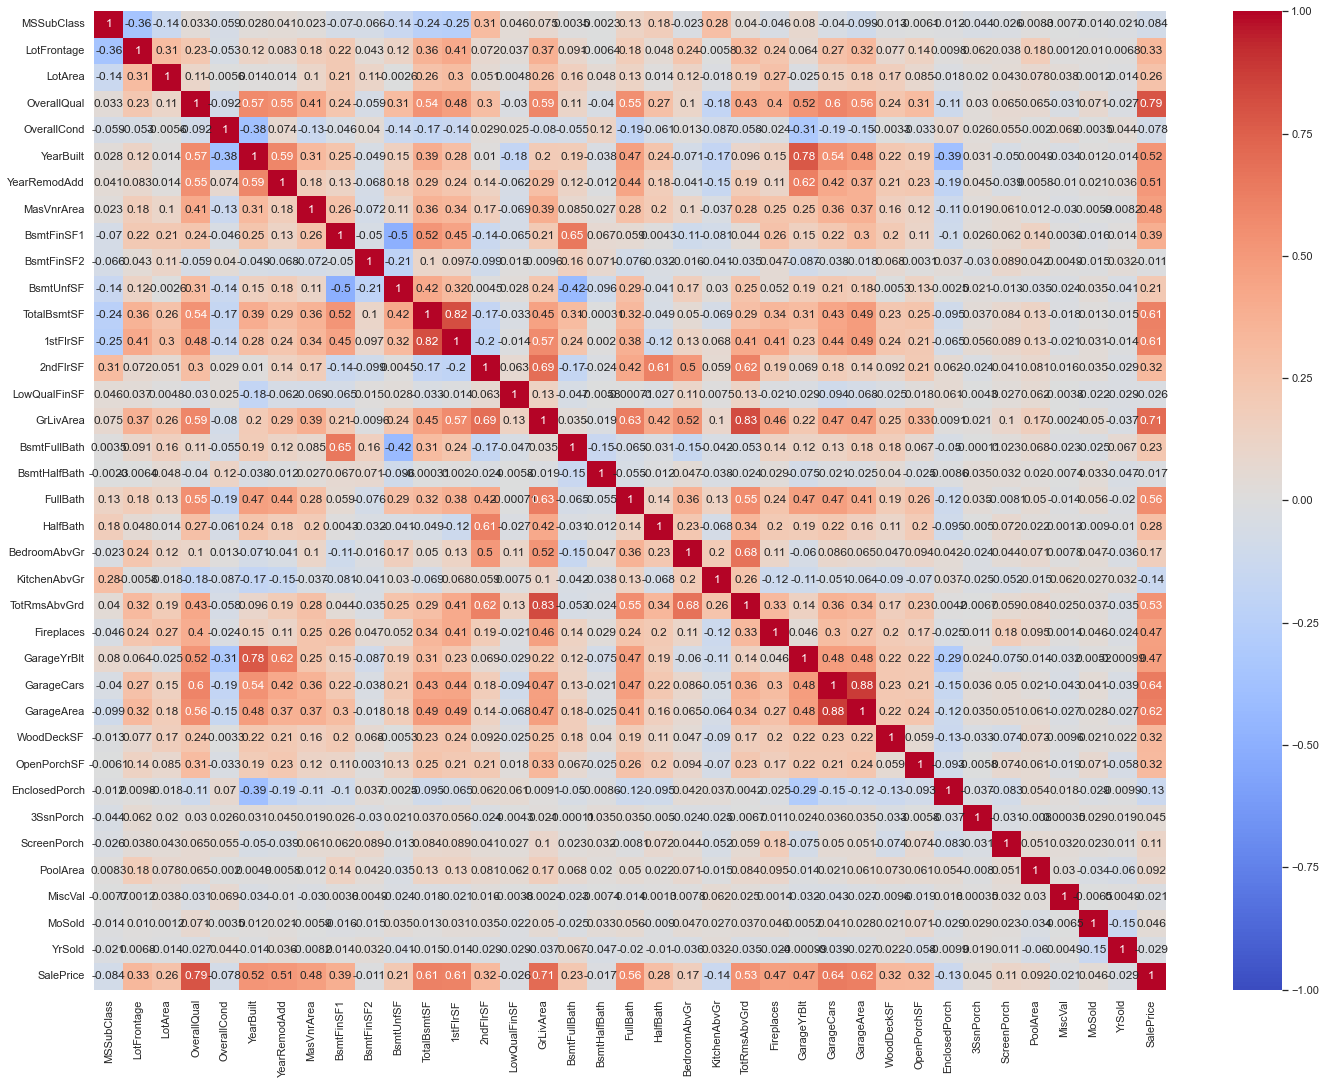

In [354]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

In [355]:
saleprice_corr = df.corr().loc['SalePrice']
saleprice_corr[saleprice_corr > 0.5].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Testando a significância estatística da correlação

In [356]:
for category in saleprice_corr[saleprice_corr > 0.5].index:
    r, p = pearsonr(df.SalePrice, df[category])
    print(f'SalePrice-{category} coef={r}; p-value={p}')

SalePrice-OverallQual coef=0.790981600583805; p-value=2.185675268e-313
SalePrice-YearBuilt coef=0.5228973328794969; p-value=2.9902290990158995e-103
SalePrice-YearRemodAdd coef=0.5071009671113861; p-value=3.1649482419207935e-96
SalePrice-TotalBsmtSF coef=0.6135805515591953; p-value=9.484229391507914e-152
SalePrice-1stFlrSF coef=0.6058521846919146; p-value=5.394710618971284e-147
SalePrice-GrLivArea coef=0.7086244776126522; p-value=4.518033646779431e-223
SalePrice-FullBath coef=0.5606637627484459; p-value=1.2364700667610025e-121
SalePrice-TotRmsAbvGrd coef=0.5337231555820281; p-value=2.772280932958432e-108
SalePrice-GarageCars coef=0.6404091972583521; p-value=2.4986441671792262e-169
SalePrice-GarageArea coef=0.6234314389183618; p-value=5.2650381679778054e-158
SalePrice-SalePrice coef=0.9999999999999998; p-value=0.0


### Aplicando a Regressão Linear

#### Primeiro modelo sem alteração do Dataset

In [357]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     182.4
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:25:07   Log-Likelihood:                -17320.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1425   BIC:                         3.489e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.66e+05   1.41e+06      0.330

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [358]:
print(f'Model mean: {model.resid.mean()}')

Model mean: -9.377971801855794e-09


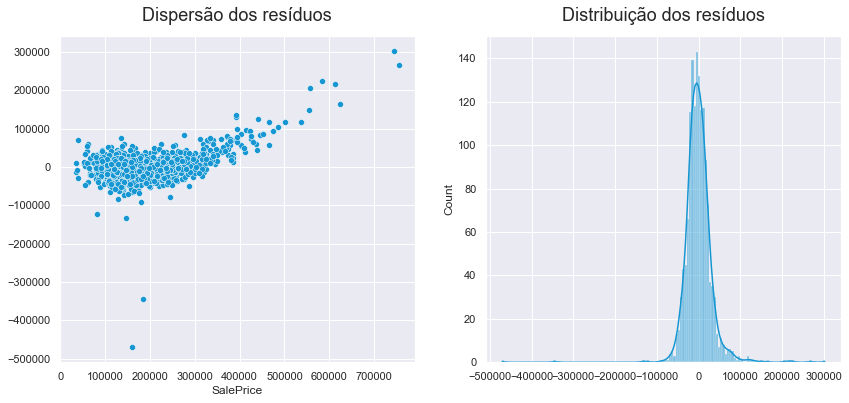

In [359]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x=y, y=model.resid, ax=axes[0])
axes[0].set_title('Dispersão dos resíduos', fontsize=18, pad=15)
sns.histplot(model.resid, kde=True, ax=axes[1])
axes[1].set_title('Distribuição dos resíduos', fontsize=18, pad=15);

<font size=4>Podemos perceber que os resíduos não se comportaram de maneira dispersa. Será necessário investigar se possíveis outliers ou features estão atrapalhando o modelo.</font>

#### Segundo Modelo

#### Investigando os outliers
Primeiro, vamos investigar as features que o modelo anterior avaliou com p-value > 0.05

In [360]:
model.pvalues[model.pvalues > 0.05].sort_values(ascending=False)

BsmtUnfSF        0.962534
MoSold           0.884523
OpenPorchSF      0.850024
BsmtFinSF2       0.839193
const            0.741723
LowQualFinSF     0.724692
MiscVal          0.693910
GarageArea       0.670345
BsmtHalfBath     0.618537
3SsnPorch        0.513945
EnclosedPorch    0.483258
HalfBath         0.475806
LotFrontage      0.277676
YrSold           0.266812
FullBath         0.224341
PoolArea         0.222117
GarageYrBlt      0.081866
dtype: float64

In [361]:
possible_outliers = df[model.pvalues[model.pvalues > 0.05].index[1:]].copy()
possible_outliers.shape

(1460, 16)

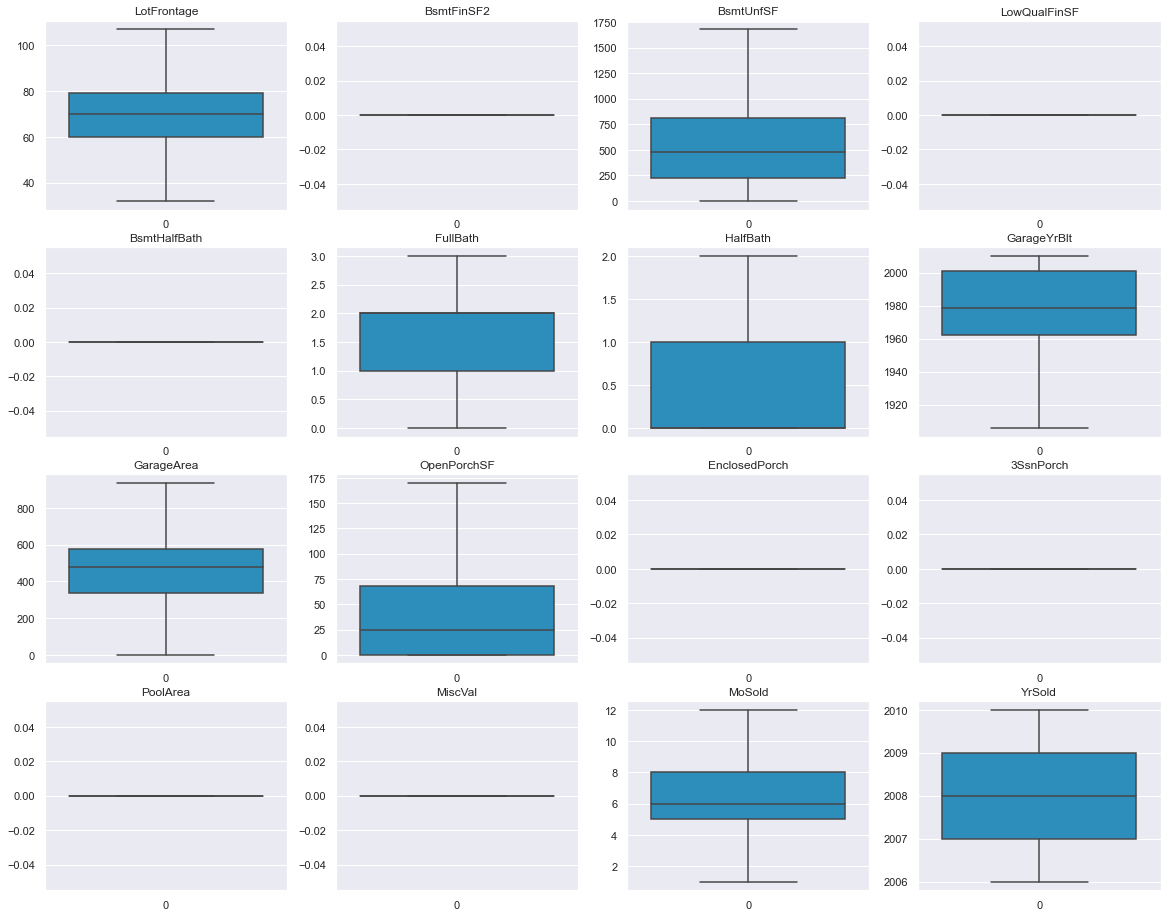

In [385]:
fig, axes = plt.subplots(4,4, figsize=(20,16))
plot_number = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(data=possible_outliers.iloc[:,plot_number], showfliers=False,ax=axes[i,j])
        axes[i,j].set_title(possible_outliers.iloc[:,plot_number].name)
        plot_number += 1

#### Tratando os outliers

In [364]:
def calc_outlier(data):
    # Primeiro quartil
    q1 = data.quantile(q=0.25) 
    # Terceiro quartil
    q3 = data.quantile(q=0.75)
    # Intervalo interquartílico
    iqr = q3 - q1 
    # Limites inferior e superior
    inf = q1 - 1.5 * iqr
    sup = q3 + 1.5 * iqr
    print(inf, sup)

    return inf, sup

In [366]:
possible_outliers.columns

Index(['LotFrontage', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Removendo os outliers

In [392]:
df_clean = df.copy()
df_clean.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','MoSold'], 
        axis=1, inplace=True)

In [ ]:
"""df_clean = pd.DataFrame()
for column in possible_outliers.columns:
    inf, sup = calc_outlier(df[column])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    df_clean[column] = df[(df[column] > inf) & (df[column] < sup)]"""

#### Criando o modelo

In [393]:
X = df_clean.drop('SalePrice', axis=1)
y = df_clean.SalePrice

x = sm.add_constant(X)
model2 = sm.OLS(y, x).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     221.8
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:35:22   Log-Likelihood:                -17321.
No. Observations:                1460   AIC:                         3.470e+04
Df Residuals:                    1431   BIC:                         3.485e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.804e+05   1.39e+06      0.273   

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [394]:
print(f'Model mean: {model2.resid.mean()}')

Model mean: 6.802801093826555e-09


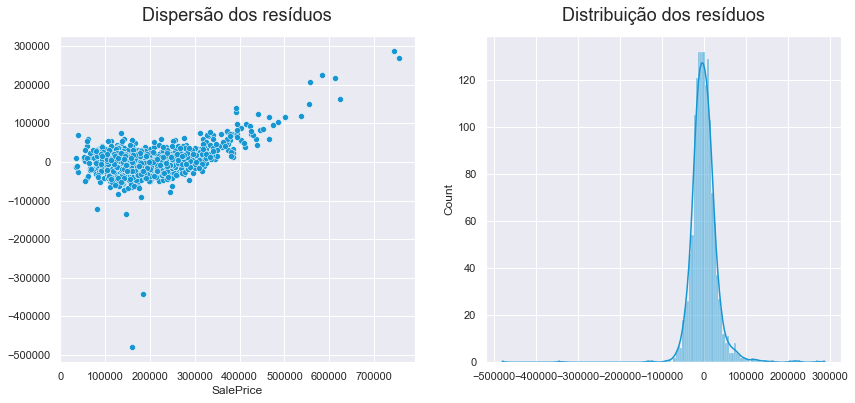

In [395]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x=y, y=model2.resid, ax=axes[0])
axes[0].set_title('Dispersão dos resíduos', fontsize=18, pad=15)
sns.histplot(model2.resid, kde=True, ax=axes[1])
axes[1].set_title('Distribuição dos resíduos', fontsize=18, pad=15);

In [396]:
model2.pvalues[model2.pvalues>0.05].sort_values(ascending=False)

BsmtUnfSF      0.897229
OpenPorchSF    0.793118
const          0.784715
GarageArea     0.643240
HalfBath       0.504351
YrSold         0.294060
1stFlrSF       0.231100
TotalBsmtSF    0.229393
2ndFlrSF       0.227456
GrLivArea      0.224493
LotFrontage    0.224130
FullBath       0.203209
GarageYrBlt    0.079610
BsmtFinSF1     0.077338
dtype: float64

### Divisão do Treino-Teste

In [399]:
X_final = df.drop('SalePrice', axis=1)

y_final = df.SalePrice

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=101)

In [402]:
lr = LinearRegression().fit(X_train, y_train)

In [403]:
y_pred = np.exp(lr.predict(X_test))

/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/ipykernel_8526/2030503242.py:1: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(lr.predict(X_test))


In [404]:
y_true = np.exp(y_test)

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [405]:
r2_score(y_true, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [406]:
lr.score(X_train, y_train)

0.8479839164162026